In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Mounted at /gdrive
/gdrive


In [ ]:
!pip install vecstack


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=511943b2fd99c799282644d83cc651dfc9dd19e4dd5a7af4f2fd7d3305b61aa3
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from collections import Counter #for Smote, 

import warnings
warnings.filterwarnings("ignore")


In [ ]:

trainfile = r'/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/train.csv'
train_data = pd.read_csv(trainfile)

#train_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud - TRAIN-3000(1).csv")


testfile = r'/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/test.csv'
test_data = pd.read_csv(testfile)

#test_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud -TEST-12900(1).csv")


print(train_data.shape)
print(test_data.shape)
print(train_data.head())    


(260753, 299)
(173836, 298)
   QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  Field7  \
0            1          2013-08-16                     0      B      23   
1            2          2014-04-22                     0      F       7   
2            4          2014-08-25                     0      F       7   
3            6          2013-04-15                     0      J      10   
4            8          2014-01-25                     0      E      23   

   Field8  Field9 Field10  Field11 Field12  ...  GeographicField59A  \
0  0.9403  0.0006     965   1.0200       N  ...                   9   
1  1.0006  0.0040     548   1.2433       N  ...                  10   
2  1.0006  0.0040     548   1.2433       N  ...                  15   
3  0.9769  0.0004   1,165   1.2665       N  ...                   6   
4  0.9472  0.0006   1,487   1.3045       N  ...                  18   

   GeographicField59B  GeographicField60A  GeographicField60B  \
0                   9        

In [ ]:
train_data


,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,434584,2013-05-16,0,J,23,0.9691,0.0004,"1,165",1.2665,N,...,7,6,-1,22,-1,20,-1,8,N,TX
260749,434585,2014-12-07,0,J,26,0.8870,0.0004,"1,113",1.2665,N,...,5,4,25,25,-1,2,-1,20,N,TX
260750,434586,2014-02-18,0,F,11,0.9685,0.0040,548,1.1886,N,...,16,20,-1,10,-1,9,-1,8,N,NJ
260751,434587,2014-04-08,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,11,-1,23,-1,10,-1,16,N,NJ


In [ ]:
test_data

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,3,2014-08-12,E,16,0.9364,0.0006,"1,487",1.3045,N,4,...,1,1,-1,1,-1,20,-1,25,Y,IL
1,5,2013-09-07,F,11,0.9919,0.0038,564,1.1886,N,8,...,10,10,-1,5,-1,5,-1,21,N,NJ
2,7,2013-03-29,F,15,0.8945,0.0038,564,1.0670,N,11,...,10,11,-1,20,-1,22,-1,11,N,NJ
3,9,2015-03-21,K,21,0.8870,0.0004,"1,113",1.2665,Y,14,...,8,8,-1,13,-1,8,-1,21,N,TX
4,10,2014-12-10,B,25,0.9153,0.0007,935,1.0200,N,4,...,7,7,-1,3,-1,22,-1,21,N,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173831,434570,2014-06-02,F,7,1.0006,0.0040,548,1.2433,N,13,...,13,15,25,25,-1,14,-1,9,N,NJ
173832,434573,2015-02-18,B,25,0.9153,0.0007,935,1.0200,N,10,...,22,24,-1,22,-1,2,-1,20,N,CA
173833,434574,2014-03-29,B,25,0.9153,0.0007,935,1.0200,N,4,...,1,1,-1,5,-1,9,-1,23,N,CA
173834,434575,2014-03-08,J,26,0.8922,0.0004,"1,113",1.2665,N,4,...,5,4,-1,6,-1,24,-1,11,N,TX


In [ ]:
#train_data.select_dtypes(exclude = 'number')  #finding the coloums that contain categorial data

In [ ]:
#list(train_data.select_dtypes(exclude = 'number').columns)

In [ ]:
# ## Dropping Original_quote_date
def drop_cols(df):
    df.drop(['Original_Quote_Date'],axis=1,inplace=True)
    return df

train_data = drop_cols(train_data)
test_data = drop_cols(test_data)

In [ ]:
# ## Removing columns with na values
cols_to_delete = train_data.isna().sum()[train_data.isna().sum() > 0].index

def drop_cols_from_list(df,cols_to_delete):
    df.drop(cols_to_delete,axis=1,inplace=True)
    return df

train_data = drop_cols_from_list(train_data,cols_to_delete)
test_data = drop_cols_from_list(test_data,cols_to_delete)

In [ ]:
#dropping categorical columns with nunique > 2
cols_to_drop = []

for i in set(train_data.columns) - set(train_data._get_numeric_data().columns):
    if (train_data.loc[:,i].nunique() >= 3):
        cols_to_drop.append(i)
        
train_data = drop_cols_from_list(train_data,cols_to_drop)
test_data = drop_cols_from_list(test_data,cols_to_drop)


#one hot encoding:
cls_to_encode = set(train_data.columns) - set(train_data._get_numeric_data().columns)

def ohe(df,cls_to_encode):
    df = pd.get_dummies(df,columns=cls_to_encode,drop_first=True)
    return df

train_data = ohe(train_data,cls_to_encode)
test_data = ohe(test_data,cls_to_encode)


#dropping any extra columns in test set that are not present in train set
test_data.drop(list(set(test_data.columns) - set(train_data.columns)),axis=1,inplace=True)

In [ ]:
X = train_data.drop('QuoteConversion_Flag',axis=1)
y = train_data.QuoteConversion_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

train accuracy score =  0.9999904123642152
test accuracy score =  0.9168951697954019


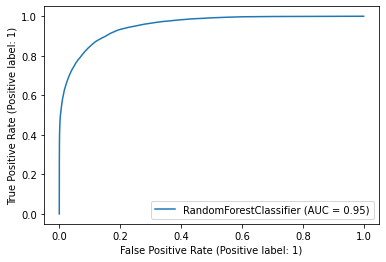

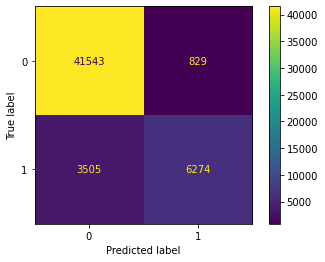

In [ ]:
#training Randomforest
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train,y_train)

print("train accuracy score = ", accuracy_score(y_train,rfc.predict(X_train)))
print("test accuracy score = ", accuracy_score(y_test,rfc.predict(X_test)))

plot_roc_curve(rfc, X_test, y_test)
plt.show()

plot_confusion_matrix(rfc, X_test, y_test,values_format='d')
plt.show()

In [ ]:

rfc_predict = rfc.predict(X_test)
print("accuracy Score (training)".format(rfc.score(X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,rfc_predict))
print("=== Classification Report ===")
print(classification_report(y_test,rfc_predict))

accuracy Score (training)
Confusion Matrix after hypertuning for Random Forest:
[[41543   829]
 [ 3505  6274]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     42372
           1       0.88      0.64      0.74      9779

    accuracy                           0.92     52151
   macro avg       0.90      0.81      0.85     52151
weighted avg       0.91      0.92      0.91     52151



In [ ]:
result_predict = pd.DataFrame(rfc.predict(test_data))
result_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
173831,0
173832,0
173833,1
173834,0


In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']
result_predict

,QuoteConversion_Flag
0,0
1,0
2,0
3,0
4,0
...,...
173831,0
173832,0
173833,1
173834,0


In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [ ]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf_predict=clf.predict(X_test)
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(X_test,y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(y_test,clf_predict))


accuracy Score (training) for Decision Tree:0.885371
Confusion Matrix for Decision Tree
[[39246  3126]
 [ 2852  6927]]


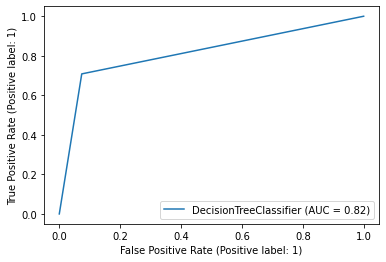

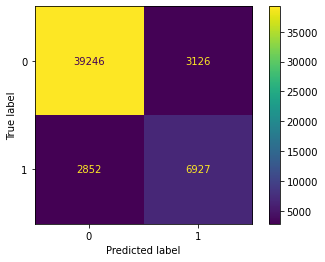

In [ ]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

plot_confusion_matrix(clf, X_test, y_test,values_format='d')
plt.show()

In [ ]:
clf_predict = clf.predict(X_test)
print("accuracy Score (training)".format(clf.score(X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,clf_predict))
print("=== Classification Report ===")
print(classification_report(y_test,clf_predict))

accuracy Score (training)
Confusion Matrix after hypertuning for Random Forest:
[[39246  3126]
 [ 2852  6927]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     42372
           1       0.69      0.71      0.70      9779

    accuracy                           0.89     52151
   macro avg       0.81      0.82      0.81     52151
weighted avg       0.89      0.89      0.89     52151



In [ ]:
result_predict = pd.DataFrame(clf.predict(test_data))
result_predict

,0
0,0
1,0
2,0
3,0
4,1
...,...
173831,0
173832,0
173833,1
173834,0


In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']
result_predict

,QuoteConversion_Flag
0,0
1,0
2,0
3,0
4,1
...,...
173831,0
173832,0
173833,1
173834,0


In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/DT_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/DT_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,1


In [ ]:
#Construct MultiLayer Perceptron Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
mlp.fit(X_train, y_train)
mlp_predict=mlp.predict(X_test)
print("accuracy Score (training) for MultiLayer Perceptron:{0:6f}".format(mlp.score(X_test,y_test)))
print("Confusion Matrix for MultiLayer Perceptron:")
print(confusion_matrix(y_test,mlp_predict))


accuracy Score (training) for MultiLayer Perceptron:0.520412
Confusion Matrix for MultiLayer Perceptron:
[[17920 24452]
 [  559  9220]]


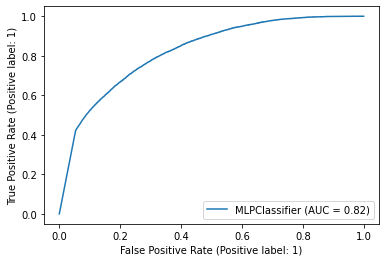

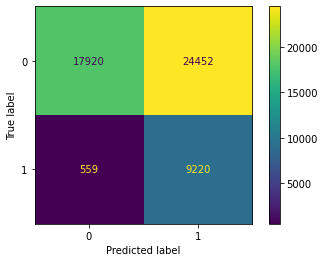

In [ ]:
plot_roc_curve(mlp, X_test, y_test)
plt.show()

plot_confusion_matrix(mlp, X_test, y_test,values_format='d')
plt.show()

In [ ]:
clf_predict = clf.predict(X_test)
print("accuracy Score (training)".format(clf.score(X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,clf_predict))
print("=== Classification Report ===")
print(classification_report(y_test,clf_predict))

accuracy Score (training)
Confusion Matrix after hypertuning for Random Forest:
[[39246  3126]
 [ 2852  6927]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     42372
           1       0.69      0.71      0.70      9779

    accuracy                           0.89     52151
   macro avg       0.81      0.82      0.81     52151
weighted avg       0.89      0.89      0.89     52151



In [ ]:
result_predict = pd.DataFrame(clf.predict(test_data))

In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/MLP_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/MLP_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,1


In [ ]:
#Construct K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#X = train_data.drop('QuoteConversion_Flag',axis=1)
#y = train_data.QuoteConversion_Flag
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
neigh.fit(X_train, y_train)
neigh_predict=neigh.predict(X_test)
print("accuracy Score (training) for KNeighborsClassifier:{0:6f}".format(neigh.score(X_test,y_test)))
print("Confusion Matrix for KNeighborsClassifier:")
print(confusion_matrix(y_test,neigh_predict))


accuracy Score (training) for KNeighborsClassifier:0.756553
Confusion Matrix for KNeighborsClassifier:
[[38506  3866]
 [ 8830   949]]


In [ ]:
neigh_predict = neigh.predict(X_test)
print("accuracy Score (training)".format(neigh.score(X_test,y_test)))
print("Confusion Matrix ")
print(confusion_matrix(y_test,neigh_predict))
print("=== Classification Report ===")
print(classification_report(y_test,neigh_predict))

accuracy Score (training)
Confusion Matrix 
[[38506  3866]
 [ 8830   949]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     42372
           1       0.20      0.10      0.13      9779

    accuracy                           0.76     52151
   macro avg       0.51      0.50      0.49     52151
weighted avg       0.70      0.76      0.72     52151



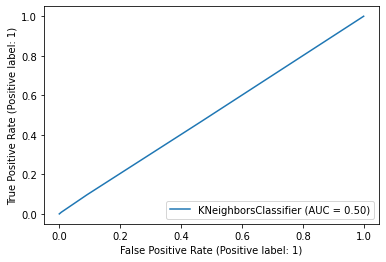

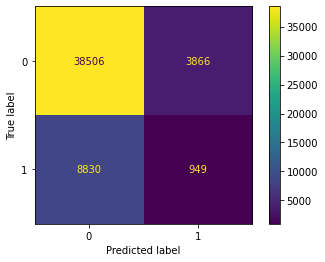

In [ ]:
plot_roc_curve(neigh, X_test, y_test)
plt.show()

plot_confusion_matrix(neigh, X_test, y_test,values_format='d')
plt.show()

In [ ]:
result_predict = pd.DataFrame(neigh.predict(test_data))

In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/KNN_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/KNN_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [ ]:
#Construct Linear Support Vector Machine Model
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm.fit(X_train, y_train) 
linsvm_predict=linsvm.predict(X_test) 
print("accuracy Score (training) for Linear SVM Classifier:{0:6f}".format(linsvm.score(X_test,y_test))) 
print("Confusion Matrix for Linear SVM Classifier:") 
print(confusion_matrix(y_test,linsvm_predict))


accuracy Score (training) for Linear SVM Classifier:0.211022
Confusion Matrix for Linear SVM Classifier:
[[ 1439 40933]
 [  213  9566]]


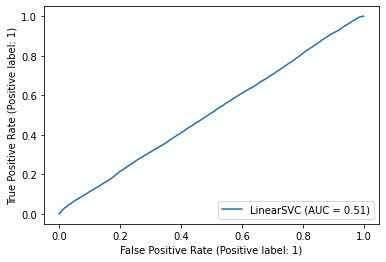

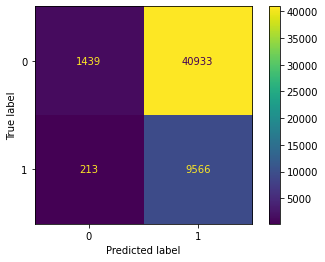

In [ ]:
plot_roc_curve(linsvm, X_test, y_test)
plt.show()

plot_confusion_matrix(linsvm, X_test, y_test,values_format='d')
plt.show()

In [ ]:
print("accuracy Score (training)".format(linsvm.score(X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,linsvm_predict))
print("=== Classification Report ===")
print(classification_report(y_test,linsvm_predict))

accuracy Score (training)
Confusion Matrix after hypertuning for Random Forest:
[[ 1439 40933]
 [  213  9566]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.03      0.07     42372
           1       0.19      0.98      0.32      9779

    accuracy                           0.21     52151
   macro avg       0.53      0.51      0.19     52151
weighted avg       0.74      0.21      0.11     52151



In [ ]:
result_predict = pd.DataFrame(linsvm.predict(test_data))


In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/LINSVM_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/LINSVM_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [ ]:
#Construct Support Vector Machine Model
from sklearn.svm import SVC 
svm = SVC(max_iter=500) 
svm.fit(X_train, y_train) 
svm_predict=svm.predict(X_test) 
print("accuracy Score (training) for SVM Classifier:{0:6f}".format(svm.score(X_test,y_test))) 
print("Confusion Matrix for SVM Classifier:") 
print(confusion_matrix(y_test,svm_predict))

accuracy Score (training) for SVM Classifier:0.384576
Confusion Matrix for SVM Classifier:
[[13304 29068]
 [ 3027  6752]]


In [ ]:
print("accuracy Score (training)".format(svm.score(X_test,y_test)))
print("Confusion Matrix ")
print(confusion_matrix(y_test,svm_predict))
print("=== Classification Report ===")
print(classification_report(y_test,svm_predict))

accuracy Score (training)
Confusion Matrix 
[[13304 29068]
 [ 3027  6752]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.31      0.45     42372
           1       0.19      0.69      0.30      9779

    accuracy                           0.38     52151
   macro avg       0.50      0.50      0.37     52151
weighted avg       0.70      0.38      0.42     52151



# ***SMOTE***

In [ ]:
print("___________________________________________________________________\nSMOTE\n")
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(sampling_strategy= 1 )
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

___________________________________________________________________
SMOTE

Original dataset shape Counter({0: 169487, 1: 39115})
Resampled dataset shape Counter({0: 169487, 1: 169487})


In [ ]:
#y.value_counts()

In [ ]:
#y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy=0.5)
#X_res ,y_res = rus.fit_resample (X,y)
#ax = y_res.value_counts().plot.pie(autopct = '%.2f')
#_= ax.set_title('Under-Sampling')

In [ ]:
#y_res.value_counts()

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=0) # Float
#ros = RandomOverSampler(sampling_strategy=0.5 ) # String
#_res, y_res = ros.fit_resample(X, y)

#ax = y_res.value_counts().plot.pie(autopct='%.2f')
#_ = ax.set_title("Over-sampling")

In [ ]:
#y_res.value_counts()

# ***ENSEMBLE METHODS STACKING***

In [ ]:
print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier\n")

models = [ KNeighborsClassifier(), MLPClassifier(), LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier() ]
      
S_Train, S_Test = stacking(models,                   
                           X_res, y_res, test_data,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=2, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)


___________________________________________________________________________________________
Ensemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.66411583]
    fold  1:  [0.66459964]
    ----
    MEAN:     [0.66435774] + [0.00024191]
    FULL:     [0.66435774]

model  1:     [MLPClassifier]
    fold  0:  [0.83591072]
    fold  1:  [0.84611799]
    ----
    MEAN:     [0.84101436] + [0.00510364]
    FULL:     [0.84101436]

model  2:     [LinearSVC]
    fold  0:  [0.54851405]
    fold  1:  [0.52739148]
    ----
    MEAN:     [0.53795276] + [0.01056128]
    FULL:     [0.53795276]

model  3:     [RandomForestClassifier]
    fold  0:  [0.93997180]
    fold  1:  [0.93999540]
    ----
    MEAN:     [0.93998360] + [0.00001180]
    FULL:     [0.93998360]

model  4:     [Decis

In [ ]:
# Initialize 2-nd level model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
model = XGBRegressor(seed = 0, n_jobs = -1, learning_rate = 0.1, n_estimators = 100, max_depth = 3)
    
# Fit 2-nd level model
model = model.fit(S_Train, y_res)
    # Predict
y_pred = model.predict(S_Test)
    # Final prediction score
#print('Final prediction score: [%.8f]' %accuracy_score (y_test, y_pred))

[06:47:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
result_predict = pd.DataFrame(y_pred)

In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/XGBOOST_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/XGBOOST_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.019818
1,5,0.019818
2,7,0.056964
3,9,0.019818
4,10,0.094405


In [ ]:
model = RandomForestClassifier(n_jobs=-1)
    
model = model.fit(S_Train, y_res)
y_pred = model.predict(S_Test)
#print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(S_Test, y_pred))

In [ ]:
#Hyperparameter tuning for random forest classifier
parameters={'min_samples_leaf' : range(5,400,20),'max_depth': 
            range(5,30,2),'max_features':[2,3,4],'n_estimators':[10,20,50]}
rfc_random = RandomizedSearchCV (rfc,parameters,n_iter=15)
rfc_random.fit(S_Train, y_res)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)

#Construct Random Forest with best parameters
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(S_Train,y_res)
rfc_predict = rfc.predict(S_Test)
#print("accuracy Score (training) after hypertuning for Random Forest:{0:6f}".format(rfc.score(X_test1,y_test)))
#print("Confusion Matrix after hypertuning for Random Forest:")
#print(confusion_matrix(y_test,rfc_predict))
#print("=== Classification Report ===")
#print(classification_report(y_test,rfc_predict))

#get cross-validation report
#rfc_cv_score = cross_val_score(rfc, S_Train, y_res, cv=10, scoring="roc_auc")
#print("=== All AUC Scores ===")
#print(rfc_cv_score)
#print('\n')
#print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ",rfc_cv_score.mean())

{'n_estimators': 10, 'min_samples_leaf': 345, 'max_features': 2, 'max_depth': 7}


In [ ]:
result_predict = pd.DataFrame(rfc.predict(S_Test))

In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/RF_Stacking1_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/RF_Stacking_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [ ]:
#get cross-validation report
rfc_cv_score = cross_val_score(rfc, S_Train, y_res, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ",rfc_cv_score.mean())

=== All AUC Scores ===
[0.9100253  0.91380381 0.96842867 0.99284153 0.99297829 0.99286032
 0.99352363 0.99361703 0.99322947 0.99273509]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9744043147754606


In [ ]:
#Hyperparameter tuning done for MultiLayer Perceptron classifier

#parameters = {'hidden_layer_sizes':[(10,), (20,)], 'activation':['tanh', 'relu'], 'solver':['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate':['constant', 'adaptive']}
#parameters = {'hidden_layer_sizes':[(10,5), (20,5)], 'activation':['tanh', 'relu'], 'learning_rate':['constant', 'adaptive']}
parameters = {'hidden_layer_sizes':[(10,5,3), (20,7,3)], 'activation':['tanh', 'relu'], 'learning_rate':['constant', 'adaptive'], 'max_iter' :[100, 150]}
#parameters = {'hidden_layer_sizes':[(10,), (15,), (10,5), (20,7,3)]}

mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15)
mlp_random.fit(S_Train, y_res)
grid_parm=mlp_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the MLPClassifier 
mlp = MLPClassifier(**grid_parm)
mlp.fit(S_Train,y_res)
mlp_predict = mlp.predict(S_Test)

#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
#print("accuracy Score (training) after hypertuning for MultiLayer Perceptron:{0:6f}".format(mlp.score(X_test1,y_test)))
#print("Confusion Matrix after hypertuning for MultiLayer Perceptron")
#print(confusion_matrix(y_test,mlp_predict))
#print("=== Classification Report ===")
#print(classification_report(y_test,mlp_predict))

#get cross-validation report
#mlp_cv_score = cross_val_score(mlp, X_train1, y_train, cv=10, scoring="roc_auc")
#print("=== All AUC Scores ===")
#print(mlp_cv_score)
#print('\n')
#print("=== Mean AUC Score ===")
#print("Mean AUC Score - MultiLayer Perceptron: ",mlp_cv_score.mean())

{'max_iter': 150, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 5, 3), 'activation': 'tanh'}


In [ ]:
#model = MLPClassifier()
    
#model = model.fit(S_Train, y_res)
#y_pred = model.predict(S_Test)
#print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(y_test, y_pred))


In [ ]:
result_predict = pd.DataFrame(mlp_predict)

In [ ]:
result_predict.columns =  ['QuoteConversion_Flag']

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/MLP1_Stacking_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/MLP1_Stacking_results.csv')
res.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [ ]:
#get cross-validation report
mlp_cv_score = cross_val_score(mlp, S_Train, y_res, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(mlp_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - MultiLayer Perceptron: ",mlp_cv_score.mean())

=== All AUC Scores ===
[0.91004684 0.91392665 0.96840743 0.99282681 0.99297048 0.99285848
 0.99338464 0.99362367 0.99324396 0.99276202]


=== Mean AUC Score ===
Mean AUC Score - MultiLayer Perceptron:  0.974405097769192


In [ ]:
model = KNeighborsClassifier()
    
model = model.fit(S_Train, y_res)
y_pred = model.predict(S_Test)
#print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(S_Test, y_pred))

In [ ]:
result_predict = pd.DataFrame(y_pred)

In [ ]:
result_predict = pd.DataFrame(y_pred)

In [ ]:
pd.concat([test_data.QuoteNumber,result_predict],axis=1).to_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/KNN_Stacking_results.csv', index = None)
res = pd.read_csv('/gdrive/My Drive/CIS_508/Assignment_3_CIS508/Data/KNN_Stacking_results.csv')
res.head()

,QuoteNumber,0
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0
